# <center><u>LOGISTIC REGRESSION</u></center>

Hi aspirant, You have already learned simple, multiple and some advance regression techniques. Now lets jump to another hands-on assignment on Logistic regression.

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

Do watch this video for its indepth conceptual clarity: https://www.youtube.com/watch?v=L_xBe7MbPwk

Also watch this video to know math behind logistic regression: https://www.youtube.com/watch?v=uFfsSgQgerw

## Problem statement:

#### Telecom Churn Case Study

With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.


So smile please and lets get started with this amazing assignment.

### Importing and Merging Data
<p style='text-align: right;'> 4 points</p>


In [1]:
# Importing Pandas and NumPy
import numpy as np
import pandas as pd

In [2]:
# Importing all datasets
churn_data = pd.read_csv('churn_data.csv')
customer_data = pd.read_csv('customer_data.csv')
internet_data = pd.read_csv('internet_data.csv')


In [3]:
#Merging churn_data and customer_data on 'customerID'
df_1 = pd.merge(churn_data,customer_data,on='customerID')

In [4]:
#Final dataframe with all predictor variables (merging df_1 and internet_data on 'customerID')
telecom = pd.merge(df_1,internet_data,on='customerID')

### Let's understand the structure of our dataframe
<p style='text-align: right;'> 3 points</p>


In [5]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [6]:
#Lets see statistical description for our master data
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [7]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


## Data Preparation
<p style='text-align: right;'> 10 points</p>


In [8]:
# Converting Yes to 1 and No to 0 using map
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes':1,'No':0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes':1,'No':0}) 
telecom['Churn'] = telecom['Churn'].map({'Yes':1,'No':0})
telecom['Partner'] = telecom['Partner'].map({'Yes':1,'No':0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes':1,'No':0})

### Dummy Variable Creation

As you can see there are many textual information in our data set. Lets do encoding for these classes using get_dummies() function.

In [9]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont = pd.get_dummies(telecom['Contract'],drop_first=True,prefix='Contract')
#Adding the results to the master dataframe
telecom =pd.concat([telecom,cont],axis=1) 

# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(telecom['PaymentMethod'],drop_first=True,prefix='PaymentMethod')
#Adding the results to the master dataframe
telecom =pd.concat([telecom,pm],axis=1)

# Creating a dummy variable for the variable 'gender' and dropping the first one.
gen = pd.get_dummies(telecom['gender'],drop_first=True,prefix='gender')
#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
#  dropping MultipleLines_No phone service column
ml1 =ml.drop('MultipleLines_No phone service',axis=1)

#Adding the results to the master dataframe
telecom =pd.concat([telecom,ml1],axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
iser = pd.get_dummies(telecom['InternetService'],drop_first=True,prefix='InternetService')
#Adding the results to the master dataframe
telecom =pd.concat([telecom,iser],axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os1=os.drop('OnlineSecurity_No internet service',axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)

# Creating a dummy variable for the variable 'OnlineBackup'.
ob =pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1=ob.drop('OnlineBackup_No internet service',axis=1)
#Adding the results to the master dataframe
telecom =pd.concat([telecom,ob1],axis=1)

# Creating a dummy variable for the variable 'DeviceProtection'. 
dp =pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1=dp.drop('DeviceProtection_No internet service',axis=1)
#Adding the results to the master dataframe
telecom =pd.concat([telecom,dp1],axis=1)
# Creating a dummy variable for the variable 'TechSupport'. 
ts =pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts1=ts.drop('TechSupport_No internet service',axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)

# Creating a dummy variable for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st1=st.drop('StreamingTV_No internet service',axis=1)
#Adding the results to the master dataframe
telecom=pd.concat([telecom,st1],axis=1)

# Creating a dummy variable for the variable 'StreamingMovies'. 
sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm1 = sm.drop('StreamingMovies_No internet service',axis=1)
#Adding the results to the master dataframe
telecom =pd.concat([telecom,sm1],axis=1)




### Dropping the repeated variables

Since We have already created dummies for the below variables
    
    'Contract',
    'PaymentMethod',
    'gender',
    'MultipleLines',
    'InternetService', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection',
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies'
so we can drop them off as they are now repeated in our master dataset


In [10]:
# drop all duplicate columns from telecom
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],axis=1)


The TotalCharges variable was imported as a string we need to convert it to numeric type<br>
Hint: Use pandas.to_numeric() function. Refer:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html

In [11]:
# convert to numeric
telecom['TotalCharges']=pd.to_numeric(telecom['TotalCharges'],errors='coerce')


In [12]:
# again check data type informationof our master dataset
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Now we can see we have all variables as integer.

### Checking for Outliers
<p style='text-align: right;'> 4 points</p>


Checking for outliers in the continuous variables like 'tenure','MonthlyCharges','SeniorCitizen','TotalCharges'


In [13]:
# Getting all continues variables in separate dataframe
num_telecom=telecom.loc[:,['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [14]:
# Checking outliers at 25%,50%,75%,90%,95% and 99% in num_telecom
num_telecom.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliner in your data as the numbers are gradually increasing.

### Checking for Missing Values and Inputing Them

<p style='text-align: right;'> 5 points</p>


In [15]:
# Checking total missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No                          0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [16]:
# Checking the percentage of missing values in master data
round((telecom.isnull().sum()*100)/len(telecom),2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

It means that 11/7043 = 0.001561834 i.e 0.15%, the best option to get rid of these null values in this scenario is to remove these observations from the analysis

In [17]:
# Removing NaN form TotalCharges rows
telecom = telecom.dropna()

In [18]:
# Lets Check percentage of missing values after removing the missing values
round((telecom.isnull().sum()*100)/len(telecom),2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

### Feature Standardisation

<p style='text-align: right;'> 6 points</p>


Standardization is one of the scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Here’s the formula for standardization:


![image.png](attachment:image.png)

![image-3.png](attachment:image-3.png)


We are sure that you have got this Scaling concept clear from your previous assignements. But for the sake of your revision we
provide you with following video. https://www.youtube.com/watch?v=mnKm3YP56PY

In [19]:
# Get telecom data type information
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   PaperlessBilling                       7032 non-null   int64  
 4   MonthlyCharges                         7032 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   SeniorCitizen                          7032 non-null   int64  
 8   Partner                                7032 non-null   int64  
 9   Dependents                             7032 non-null   int64  
 10  Contract_One year                      7032 non-null   uint8  
 11  Cont

In [20]:
# Getting all desired continues variables like 'tenure','MonthlyCharges' and 'TotalCharges' into one dataframe.
df =telecom.loc[:,['tenure','MonthlyCharges','TotalCharges']]


In [21]:
# Standardising above continuous features
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
std_df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns,index=df.index)


In [22]:
# Dropping 'tenure','MonthlyCharges' and 'TotalCharges' from telecom as we want to add the standardised features 
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)

In [23]:
# Add std_df into telecom
telecom = pd.concat([telecom,std_df],axis=1)

In [24]:
# print telecom tail
telecom.tail()

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
7038,6840-RESVB,1,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,-0.343137,0.664868,-0.129180
7039,2234-XADUH,1,1,0,0,1,1,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1.612573,1.276493,2.241056
7040,4801-JZAZL,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,-0.872808,-1.170004,-0.854514
7041,8361-LTMKD,1,1,1,1,1,0,0,0,0,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,-1.158016,0.319168,-0.872095
7042,3186-AJIEK,1,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1.368109,1.357932,2.012344


### Checking the Churn Rate

<p style='text-align: right;'> 2 points</p>


In [25]:
#caluclating total churn percentage in our master dataframe
churn=(len(telecom[telecom['Churn']==1]))*100/len(telecom['Churn'])


In [26]:
# print churn
churn

26.57849829351536

We have almost 27% churn rate

## Model Building

<p style='text-align: right;'> 11 points</p>

Let's start by splitting our data into a training set and a test set.

In [27]:
# Putting feature variable to X. drop 'customerID' from features as its not informative for our prediction
telecom.drop('customerID',axis=1,inplace=True)
X = telecom.drop('Churn',axis=1)

# Putting response variable to y
y =telecom['Churn']

In [28]:
# print y head
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

### Running Your First Training Model

In [29]:
# import statsmodels api as sm
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Statsmodels provides a Logit() function for performing logistic regression. The Logit() function accepts y and X as parameters and returns the Logit object. The model is then fitted to the data.

Reference: https://www.youtube.com/watch?v=JwUj5M8QY4U

### Splitting Data into Training and Test Sets

In [30]:
# import train_test_split module
from sklearn.model_selection import train_test_split

In [31]:
# adding constant to X
X=sm.add_constant(X)
# Splitting the data into train and test with train_size=0.7 and random_state=100
X_train, X_test, y_train, y_test =train_test_split(X,y,train_size=0.7,random_state=100)


In [32]:
# Logistic regression model
logm1 = sm.Logit(y_train,X_train)

#fitting and printing summary
result=logm1.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.407291
         Iterations 9


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4898
Method:                           MLE   Df Model:                           23
Date:                Tue, 15 Jun 2021   Pseudo R-squ.:                  0.2912
Time:                        08:54:33   Log-Likelihood:                -2004.7
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.5093   8.83e+05   5.77e-07      1.000   -1.73e+06    1.73e+06
PhoneService                              0.9441        nan        nan        nan         nan         nan
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_No                          0.0066        nan        nan        nan         nan         nan
MultipleLines_Yes                         0.5689        nan        nan        nan         nan         nan
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -7.2223   8.34e+05  -8.66e-06      1.000   -1.64e+06    1.64e+06
OnlineSecurity_No                        -1.1505        nan        nan        nan         nan         nan
OnlineSecurity_Yes                       -1.1750        nan        nan        nan         nan         nan
OnlineBackup_No                          -1.0344        nan        nan        nan         nan         nan
OnlineBackup_Yes                         -0.8604        nan        nan        nan         nan         nan
DeviceProtection_No                      -1.0094   1.49e+06  -6.76e-07      1.000   -2.93e+06    2.93e+06
DeviceProtection_Yes                     -0.6865   1.52e+06  -4.53e-07      1.000   -2.97e+06    2.97e+06
TechSupport_No                            0.0328   1.65e+06   1.99e-08      1.000   -3.23e+06    3.23e+06
TechSupport_Yes                           0.0024   1.79e+06   1.31e-09      1.000   -3.52e+06    3.52e+06
StreamingTV_No                           -0.9356        nan        nan        nan         nan         nan
StreamingTV_Yes                           0.0242        nan        nan        nan         nan         nan
StreamingMovies_No                       -0.3459        nan        nan        nan         nan         nan
StreamingMovies_Yes                       0.5024        nan  

Hey buddy, from above you can see that there few statistically insignificant variables present in our dataset. Lets drop them off.

Here drop those variables which has less than 70% confidence to reject the null hyposthesis looking into P values.

Few insignificant variables we can see from above stats summary are:
 
    partner
    gender_Male
    InternetService_No
    DeviceProtection_no
    DeviceProtection_Yes
    
So lets drop them off from X


In [33]:
drop_features=['Partner','gender_Male','InternetService_No','DeviceProtection_No','DeviceProtection_Yes']
X.drop(drop_features,axis=1,inplace=True)


If you still not sure about what is statistically significant values then check uout this video:
    https://www.youtube.com/watch?v=6psBul7K2gw

### Correlation Matrix

<p style='text-align: right;'> 2 points</p>


In [34]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

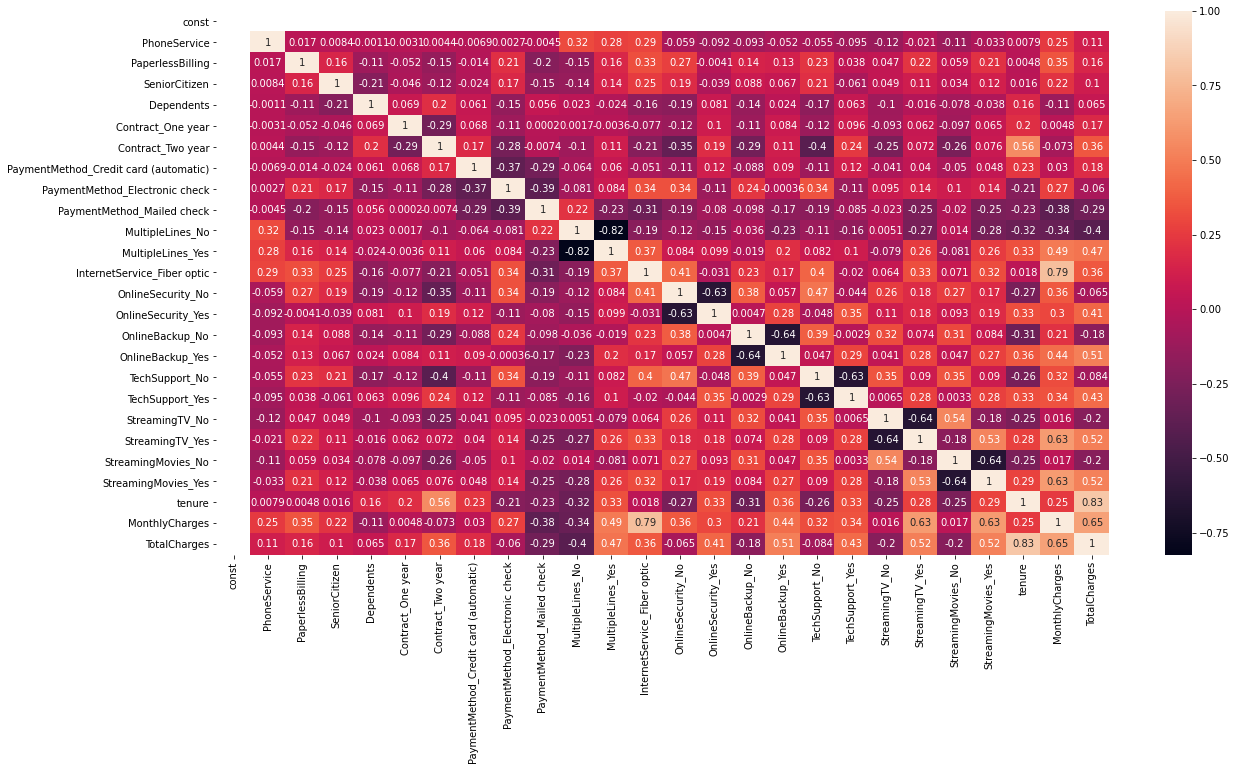

In [35]:
# Let's see the correlation matrix 
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(),annot=True)

### Dropping highly correlated variables.

<p style='text-align: right;'> 4 points</p>


Check video: https://www.youtube.com/watch?v=FndwYNcVe0U

In [36]:
# Write a correlation function to drop correllation function to remove highly correlated variables (>70%)
def correlation(dataset, threshold):
    col_corr=set()
    matrix_corr=dataset.corr()
    for i in range(len(matrix_corr.columns)):
      for j in range(i):
        if ( abs(matrix_corr.iloc[i,j])>threshold):
          col_corr.add(matrix_corr.columns[i])
    return col_corr

In [37]:
#get correlation function output with dataset as X and threshold as 0.7
corr_features = correlation(X,0.7)

# print length of corr_features
print(len(corr_features))

3


In [38]:
#print corr_features

corr_features

{'MonthlyCharges', 'MultipleLines_Yes', 'TotalCharges'}

In [39]:
# Lets drop the above variables from X

X.drop(corr_features,axis=1,inplace=True)

## Dropping Variable with high VIF

<p style='text-align: right;'> 5 points</p>


Lets check multicollinearity using Variance inflation factor too!

Reference: https://www.youtube.com/watch?v=6JpmgzCAusI

In [40]:
# Import library for VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
# empty dataframe
vif=pd.DataFrame()

#variables names with all variables in column X
vif["variables"] =X.columns

# Vif scores for corresponding features
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [41]:
# print vif sorted values
vif.sort_values(by='VIF')

,variables,VIF
4,Dependents,1.112451
3,SeniorCitizen,1.141759
2,PaperlessBilling,1.207510
1,PhoneService,1.452461
10,MultipleLines_No,1.456244
7,PaymentMethod_Credit card (automatic),1.559004
5,Contract_One year,1.616394
9,PaymentMethod_Mailed check,1.835714
8,PaymentMethod_Electronic check,1.972483
11,InternetService_Fiber optic,2.004446


Lets drop variables which are having infinite vif scores.

they are:
    
    OnlineSecurity_No
    OnlineSecurity_Yes
    OnlineBackup_No
    OnlineBackup_Yes
    TechSupport_No
    TechSupport_Yes
    StreamingTV_No
    StreamingTV_Yes
    StreamingMovies_No
    StreamingMovies_Yes

In [42]:
# Lets drop above variables also from X
features_to_drop=['OnlineSecurity_No','OnlineSecurity_Yes','OnlineBackup_No','OnlineBackup_Yes','TechSupport_No','TechSupport_Yes','StreamingTV_No','StreamingTV_Yes','StreamingMovies_No','StreamingMovies_Yes']

X.drop(features_to_drop,axis=1,inplace=True)

### Checking the Correlation Matrix again

After dropping highly correlated variables now let's check the correlation matrix again.

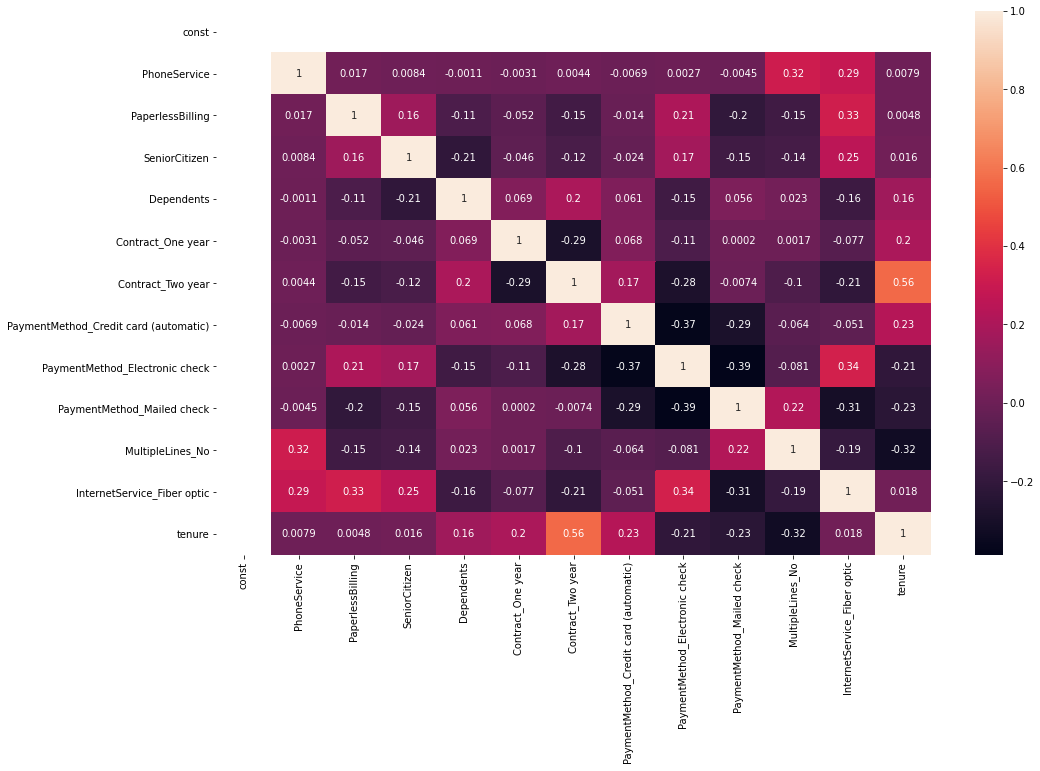

In [43]:
#plot heatmap
plt.figure(figsize=(16,10))
sns.heatmap(X.corr(),annot=True)


### Re-Running the Model

<p style='text-align: right;'> 3 points</p>


Now let's run our model again after dropping highly correlated variables

In [44]:
# Splitting the data into train and test with train_size=0.7 and random_state=100 again
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)
# building model again
logm2 = sm.Logit(y_train,X_train)


#fitting model and printing summary
model=logm2.fit()
model.summary()


Optimization terminated successfully.
         Current function value: 0.417036
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4909
Method:                           MLE   Df Model:                           12
Date:                Tue, 15 Jun 2021   Pseudo R-squ.:                  0.2742
Time:                        08:54:38   Log-Likelihood:                -2052.6
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3920      0.171     -8.122      0.000      -1.728      -1.056
PhoneService                             -0.4147      0.157     -2.643      0.008      -0.722      -0.107
PaperlessBilling                          0.4111      0.088      4.672      0.000       0.239       0.584
SeniorCitizen                             0.4432      0.101      4.399      0.000       0.246       0.641
Dependents                               -0.1692      0.097     -1.742      0.082      -0.360       0.021
Contract_One year                        -0.7079      0.124     -5.704      0.000      -0.951      -0.465
Contract_Two year                        -1.3844      0.204     -6.795      0.000      -1.784      -0.985
PaymentMethod_Credit card (automatic)    -0.2624      0.135     -1.939      0.052      -0.528       0.003
PaymentMethod_Electronic check            0.2566      0.111      2.309      0.021       0.039       0.474
PaymentMethod_Mailed check               -0.3039      0.133     -2.290      0.022      -0.564      -0.044
MultipleLines_No                         -0.3210      0.094     -3.419      0.001      -0.505      -0.137
InternetService_Fiber optic               1.2643      0.100     12.626      0.000       1.068       1.461
tenure                                   -0.8844      0.064    -13.837      0.000      -1.010      -0.759
=========================================================================================================
"""

### Feature Selection Using RFE

<p style='text-align: right;'> 5 points</p>


Lets do feature selection using LogisticRegression with RFE

In [45]:
# import RFE and LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initiate LogisticRegression()
logreg = LogisticRegression()

 # Initialise RFE 
rfe =RFE(estimator=logreg)   

# fitting RFE 
rfe = rfe.fit(X,y)

# Printing the boolean results
print(  rfe.get_support()    )     
# Printing the ranking
print( rfe.ranking_      )           

[False  True False False False  True  True False  True False False  True
  True]
[8 1 2 4 5 1 1 7 1 6 3 1 1]


In [46]:
# printing column names which were suppported by RFE
X_train.columns[rfe.get_support()]

Index(['PhoneService', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'tenure'],
      dtype='object')

In [47]:
# Variables selected by RFE 
col = rfe.transform(X_train)
X_train_rfe=pd.DataFrame(col,columns=X_train.columns[rfe.get_support()],index=X_train.index)

In [48]:
# Let's run the model using the selected variables but this time we will use Logistic Regression

#initialise Logistic Regression
logsk =LogisticRegression()


#fitting model using above columns as input
logsk.fit(X_train_rfe,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
#recreating the model with StatsModels with RFE selecte columns

logm3 = sm.Logit(y_train,X_train_rfe)
model=logm3.fit()
# Fitting and printing model summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.434023
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4916
Method:                           MLE   Df Model:                            5
Date:                Tue, 15 Jun 2021   Pseudo R-squ.:                  0.2447
Time:                        08:54:39   Log-Likelihood:                -2136.3
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                4.398e-297
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
PhoneService                      -1.7191      0.087    -19.816      0.000      -1.889      -1.549
Contract_One year                 -1.2010      0.115    -10.472      0.000      -1.426      -0.976
Contract_Two year                 -2.1006      0.192    -10.923      0.000      -2.477      -1.724
PaymentMethod_Electronic check     0.3180      0.077      4.119      0.000       0.167       0.469
InternetService_Fiber optic        1.5170      0.093     16.336      0.000       1.335       1.699
tenure                            -0.5832      0.053    -10.990      0.000      -0.687      -0.479
==================================================================================================
"""

### Making Predictions

<p style='text-align: right;'> 14 points</p>


In [50]:
# Predicted probabilities
col = rfe.transform(X_test)
X_test=pd.DataFrame(col,columns=X_test.columns[rfe.get_support()],index=X_test.index)
y_pred = model.predict(X_test)

In [51]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)


In [52]:
# Converting to column dataframe
y_pred_1 = y_pred_df
y_pred_1.columns=['1']
y_pred_1.index= np.arange(0, len(y_pred_1))

In [53]:
# Let's see the head
y_pred_1.head()

,1
0,0.499522
1,0.313024
2,0.011805
3,0.632879
4,0.017576


In [54]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [55]:
# Putting CustID to index
y_test_df['CustID'] =y_test_df.index

In [56]:
# Removing index for both(y_pred_1 and y_test_df ) dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [57]:
# Appending y_test_df and y_pred_1 to y_pred_final
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [58]:
# Renaming the column 1 as Churn_Prob
y_pred_final.rename({'1':'Churn_Prob'},axis=1,inplace=True)

In [59]:
#printing y_pred_final
y_pred_final

,Churn,CustID,Churn_Prob
0,0,942,0.499522
1,1,3730,0.313024
2,0,1761,0.011805
3,1,2283,0.632879
4,0,1872,0.017576
...,...,...,...
2105,0,1289,0.025415
2106,0,3508,0.039336
2107,0,6765,0.009114
2108,0,3598,0.341980


Reference for rearranging index: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex.html

In [60]:
# Rearranging the columns using redindex


column_titles = ['CustID','Churn','Churn_Prob']

y_pred_final = y_pred_final.reindex(columns=column_titles)

In [61]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.499522
1,3730,1,0.313024
2,1761,0,0.011805
3,2283,1,0.632879
4,1872,0,0.017576


In [62]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0. Use map with lambda function
y_pred_final['predicted'] = y_pred_final['Churn_Prob'].map(lambda x:(1 if x>0.5 else 0))

In [63]:
# Let's see the head
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,942,0,0.499522,0
1,3730,1,0.313024,0
2,1761,0,0.011805,0
3,2283,1,0.632879,1
4,1872,0,0.017576,0


### Model Evaluation

<p style='text-align: right;'> 11 points</p>


Choosing the right metric is very important in any classification problem.
To know about various metrics for classification model evaluation refer: https://www.youtube.com/watch?v=aWAnNHXIKww
and https://www.youtube.com/watch?v=A_ZKMsZ3f3o


Lets check Confusion matrix for model evaluation


In [64]:
# import metrics 
from sklearn import metrics

In [65]:
# Lets check what all things python provides us in metrics.confusion_matrix using help function.
help (metrics.confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=Non

You can also refer this short video to undertand confusion metrics https://www.youtube.com/watch?v=Kdsp6soqA7o

Also its practical approach using python given in https://www.youtube.com/watch?v=TtIjAiSojFE

In [66]:
# get Confusion matrix 
from sklearn.metrics import confusion_matrix,f1_score
confusion =confusion_matrix(y_pred_final['Churn'],y_pred_final['predicted'])

#print confusion matrix
confusion

array([[1303,  225],
       [ 238,  344]])

In [67]:
# meaning of above confusion matrix is

# Predicted     not_churn    churn
# Actual
# not_churn        1363      165
# churn            273       309

In [68]:
#Let's check the overall accuracy.
(confusion[1][1]+confusion[0][0])/ (confusion[1][1]+confusion[0][0]+confusion[1][0]+confusion[0][1])

0.7805687203791469

In [69]:
# Lets check true positive ,true negatives,false positives and false negatives
TN,FP,FN,TP=confusion.ravel()


In [70]:
# Let's see the sensitivity of our logistic regression model
TP/(TP+FN)

0.5910652920962199

In [71]:
# Let us calculate specificity
TN/(FN+TN)

0.845554834523037

In [72]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/(FP+TN)

0.14725130890052357

In [73]:
# positive predictive value 
TP/(TP+FP)

0.6045694200351494

In [74]:
# Negative predictive value
TN/(TN+FN)

0.845554834523037

You can also use classification_report to get precision, recall, f1-score, support

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [75]:
# import classification report
from sklearn.metrics import classification_report
# print classification_report
print(classification_report(y_test,y_pred_final['predicted'], labels=[0,1]))


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1528
           1       0.60      0.59      0.60       582

    accuracy                           0.78      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



### ROC Curve

<p style='text-align: right;'> 1 points</p>


An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [76]:
# Here we have given you a function to plot ROC curve. Please understand the function.

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

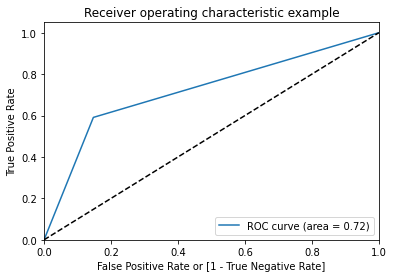

(array([0.        , 0.14725131, 1.        ]),
 array([0.        , 0.59106529, 1.        ]),
 array([2, 1, 0]))

In [77]:
# Use above function to plot ROC curve with y_pred_final.Churn and y_pred_final.predicted as parameters
draw_roc( y_pred_final.Churn,y_pred_final.predicted)


### Finding Optimal Cutoff Point'

<p style='text-align: right;'> 6 points</p>


Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [78]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
numbers
# loop numbers and append churn probability to y_pred_final for different prob cutoff 
for i in numbers:
    y_pred_final[i]=y_pred_final['Churn_Prob'].map(lambda x:(1 if x>i else 0))

    
# print  y_pred_final head
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,942,0,0.499522,0,1,1,1,1,1,0,0,0,0,0
1,3730,1,0.313024,0,1,1,1,1,0,0,0,0,0,0
2,1761,0,0.011805,0,1,0,0,0,0,0,0,0,0,0
3,2283,1,0.632879,1,1,1,1,1,1,1,1,0,0,0
4,1872,0,0.017576,0,1,0,0,0,0,0,0,0,0,0


Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.


In [79]:
# Create an empty dataframe with columns 'prob','accuracy','sensi' and 'speci'
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

#iterate through num
for i in num:
    #calculate confusion metrics
    cm1 =confusion_matrix(y_pred_final['Churn'],y_pred_final[i])
     #total in cm1
    TN,FP,FN,TP=cm1.ravel() 
    total1= TN+FP+FN+TP
    
    #Calculate accuracy
    accuracy = (TP+TN)/total1
    
    #calculate specificity
    speci = TN/(FP+TN)
    
    #calculate sensitivity
    sensi = TP/(TP+FN)
    
    #append rows in cutoff_df with cutoff values, accuracy, sensitivity and specificity
    cutoff_df.loc[i] =[i,accuracy,sensi,speci]

# print cutoff_df 
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.275829,1.000000,0.000000
0.1,0.1,0.599052,0.945017,0.467277
0.2,0.2,0.671564,0.881443,0.591623
0.3,0.3,0.746919,0.749141,0.746073
0.4,0.4,0.767299,0.658076,0.808901
0.5,0.5,0.780569,0.591065,0.852749
0.6,0.6,0.776777,0.429553,0.909031
0.7,0.7,0.748815,0.121993,0.987565
0.8,0.8,0.724171,0.000000,1.000000
0.9,0.9,0.724171,0.000000,1.000000


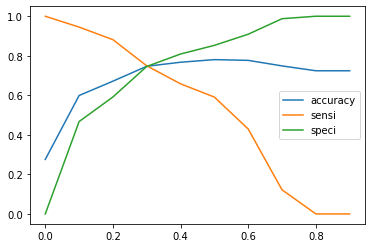

In [80]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.plot(cutoff_df['prob'],cutoff_df['accuracy'],label='accuracy')
plt.plot(cutoff_df['prob'],cutoff_df['sensi'],label='sensi')
plt.plot(cutoff_df['prob'],cutoff_df['speci'],label='speci')
plt.legend()
plt.show()

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

<p style='text-align: right;'> 4 points</p>


In [81]:
# Now lets get another column with final_predicted which has 0.3 cutoff probability

y_pred_final['final_predicted'] = y_pred_final['Churn_Prob'].map(lambda x:(1 if x>0.3 else 0))

In [82]:
# print y_pred_final head
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,942,0,0.499522,0,1,1,1,1,1,0,0,0,0,0,1
1,3730,1,0.313024,0,1,1,1,1,0,0,0,0,0,0,1
2,1761,0,0.011805,0,1,0,0,0,0,0,0,0,0,0,0
3,2283,1,0.632879,1,1,1,1,1,1,1,1,0,0,0,1
4,1872,0,0.017576,0,1,0,0,0,0,0,0,0,0,0,0


In [83]:
#Let's check the overall accuracy now again
cm_final =confusion_matrix(y_pred_final['Churn'],y_pred_final['final_predicted'])
TN,FP,FN,TP=cm_final.ravel() 
    
#Calculate accuracy
accuracy = (TP+TN)/(TN+FP+FN+TP)
accuracy

0.7469194312796209

In [84]:
cm_final

array([[1140,  388],
       [ 146,  436]])

Though this approach of finding best cutoff probability is perfectly fine, but as you can see our error got increased when cutoff is 0.3. 
The reason may be the features which we used to predict. We need go back and check them again. Else we can even try out different classification problems. But in this assignment we wanted to know how logistic regression works.

So in this assignment you learned when to use and how to use logistic regression and what all important metrics we can look for.

Well done buddy. So far so good.!

------------------------------

# Oh yeah! Congratulations you have made your first classification alogorithm! Very well done.

-------------------------------------

# Its Feedback Time!

We hope you’ve enjoyed this course so far. We’re committed to help you use "AI for All" course to its full potential, so that you have a great learning experience. And that’s why we need your help in form of a feedback here.

**Please fill this feedback form**
 https://zfrmz.in/MtRG5oWXBdesm6rmSM7N

_______________________________